In [1]:
import pandas as pd
import random
import os
import numpy as np

In [2]:
df = pd.read_csv("../src/predictions.csv")
df.head()

,filename,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p1476,p1477,p1478,p1479,p1480,support_filename,query_filename,correct_filename,rank,y
0,201506_l_2.jpg,216,860,453,298,336,860,351,826,216,...,889,382,799,261,261,421429_l_2.jpg,201506_l_2.jpg,201506_l_1.jpg,16,1
1,201506_r_2.jpg,240,240,205,0,205,262,827,262,313,...,601,516,603,623,402,421533_r_1.jpg,201506_r_2.jpg,201506_r_1.jpg,4,0
2,202037_r_1.jpg,4,384,874,150,874,785,150,785,476,...,625,757,757,739,739,202037_r_2.jpg,202037_r_1.jpg,202037_r_2.jpg,1,4
3,204295_r_2.jpg,386,386,920,920,886,886,264,978,673,...,754,940,788,788,940,422268_r_2.jpg,204295_r_2.jpg,204295_r_1.jpg,50,6
4,209127_l_2.jpg,226,9,443,455,226,455,274,38,103,...,756,71,772,268,921,421461_r_1.jpg,209127_l_2.jpg,209127_l_1.jpg,2,9


In [83]:
df[df["rank"] == 1]

,filename,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p1476,p1477,p1478,p1479,p1480,support_filename,query_filename,correct_filename,rank,y
2,202037_r_1.jpg,4,384,874,150,874,785,150,785,476,...,625,757,757,739,739,202037_r_2.jpg,202037_r_1.jpg,202037_r_2.jpg,1,4
8,209700_l_2.jpg,15,233,233,339,339,365,176,917,81,...,626,931,662,931,688,209700_l_1.jpg,209700_l_2.jpg,209700_l_1.jpg,1,15
9,209700_r_1.jpg,16,322,604,360,604,914,146,251,697,...,249,934,128,934,609,209700_r_2.jpg,209700_r_1.jpg,209700_r_2.jpg,1,16
12,210853_r_1.jpg,23,980,193,139,842,226,822,461,24,...,538,522,538,372,372,210853_r_2.jpg,210853_r_1.jpg,210853_r_2.jpg,1,23
13,420045_l_1.jpg,25,415,415,19,971,19,937,887,39,...,431,506,338,314,314,420045_l_2.jpg,420045_l_1.jpg,420045_l_2.jpg,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,65310_r_2.jpg,988,20,466,466,579,70,858,450,858,...,166,960,130,130,589,65310_r_1.jpg,65310_r_2.jpg,65310_r_1.jpg,1,988
455,65335_l_1.jpg,989,989,411,77,411,439,521,91,831,...,371,315,324,324,315,65335_l_3.jpg,65335_l_1.jpg,65335_l_3.jpg,1,989
456,65550_r_1.jpg,992,992,460,398,408,1000,516,14,687,...,832,317,733,508,508,65550_r_2.jpg,65550_r_1.jpg,65550_r_2.jpg,1,992
460,67201_l_2.jpg,997,287,121,407,287,407,885,844,462,...,24,772,24,764,764,67201_l_3.jpg,67201_l_2.jpg,67201_l_3.jpg,1,997


In [84]:
samp = df.sample(4)
samp

,filename,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p1476,p1477,p1478,p1479,p1480,support_filename,query_filename,correct_filename,rank,y
367,432800_r_2.jpg,783,938,974,938,888,974,888,898,560,...,830,196,95,376,376,432800_r_1.jpg,432800_r_2.jpg,432800_r_1.jpg,1,783
353,432219_l_1.jpg,778,778,690,606,977,636,191,756,772,...,464,73,270,468,468,432795_l_1.jpg,432219_l_1.jpg,432219_l_2.jpg,217,758
151,421891_l_1.jpg,324,324,253,798,798,792,371,798,271,...,796,407,55,53,53,421891_l_3.jpg,421891_l_1.jpg,421891_l_3.jpg,1,324
138,421784_r_1.jpg,118,118,422,226,288,186,448,621,406,...,928,900,900,928,894,420805_r_1.jpg,421784_r_1.jpg,421784_r_2.jpg,1012,296


In [85]:
df2 = pd.read_csv("../src/embeddings.csv")
df2.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x121,x122,x123,x124,x125,x126,x127,y,filename,set
0,0.086620,-0.139991,0.059609,0.161534,0.158688,-0.089619,0.025155,0.018467,-0.076601,-0.058287,...,0.109512,0.177370,-0.079485,0.186584,0.067410,-0.037368,-0.054598,1,201506_l_2.jpg,query
1,0.137820,0.011903,-0.027868,-0.009739,0.069136,-0.038754,-0.006407,-0.160226,-0.032090,0.047753,...,0.000075,-0.047645,-0.123886,0.073813,0.074439,-0.034383,0.097669,0,201506_r_2.jpg,query
2,-0.040215,0.108370,0.050484,0.142715,-0.103494,-0.001958,-0.217450,0.106569,-0.040652,-0.139501,...,-0.147253,-0.016028,0.121937,0.051789,0.070027,0.078907,-0.020537,4,202037_r_1.jpg,query
3,-0.152294,0.121527,0.114749,0.189118,-0.008413,0.065933,-0.237553,-0.039972,-0.043307,0.067980,...,0.045968,0.037243,-0.041601,0.092726,0.111902,0.051085,-0.110871,6,204295_r_2.jpg,query
4,0.180085,0.032556,0.001671,-0.051080,0.030006,0.131427,-0.097168,0.095648,0.150034,-0.043292,...,0.013091,-0.093259,0.037368,-0.094856,0.076333,0.089890,0.018110,9,209127_l_2.jpg,query


In [86]:
query_emb = df2[df2["filename"] == samp.iloc[0]["query_filename"]].iloc[0, :128]
query_emb

x0      0.0145749
x1      -0.074911
x2      0.0364718
x3      0.0376688
x4      -0.165283
          ...    
x123    0.0304648
x124    0.0331261
x125    -0.118283
x126   -0.0298563
x127     0.018624
Name: 367, Length: 128, dtype: object

In [87]:
support_emb = df2[df2["filename"] == samp.iloc[0]["support_filename"]].iloc[0, :128]
support_emb

x0      -0.0369885
x1      -0.0546083
x2       0.0886225
x3        0.139363
x4      -0.0688054
           ...    
x123     0.0822574
x124     0.0468597
x125     -0.105436
x126    -0.0291788
x127   -0.00862972
Name: 1618, Length: 128, dtype: object

In [88]:
np.linalg.norm(query_emb.sub(support_emb))

0.6466172598727679

In [89]:
root = r"D:\Jobb\Siamese Fish\data\dataset\cropped_head\direction"
path = os.path.join(root, samp["support_filename"].iloc[0])
path

'D:\\Jobb\\Siamese Fish\\data\\dataset\\cropped_head\\direction\\432800_r_1.jpg'

In [90]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


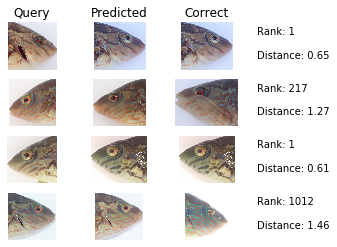

In [91]:
fig, ax = plt.subplots(nrows=4, ncols=4)
ax[0][0].set_title("Query")
ax[0][1].set_title("Predicted")
ax[0][2].set_title("Correct")
[axi.set_axis_off() for axi in ax.ravel()]
for i, row in enumerate(ax):
    jpg = samp["query_filename"].iloc[i]
    path = os.path.join(root, jpg)
    img = mpimg.imread(path)
    row[0].imshow(img)
    
    jpg = samp["support_filename"].iloc[i]
    path = os.path.join(root, jpg)
    img = mpimg.imread(path)
    row[1].imshow(img)
    
    jpg = samp["correct_filename"].iloc[i]
    path = os.path.join(root, jpg)
    img = mpimg.imread(path)
    row[2].imshow(img)
    
    query_emb = df2[df2["filename"] == samp.iloc[i]["query_filename"]].iloc[0, :128]
    support_emb = df2[df2["filename"] == samp.iloc[i]["correct_filename"]].iloc[0, :128]
    dist = np.linalg.norm(query_emb.sub(support_emb))
    
    row[3].text(0, 0.75, "Rank: " + str(samp["rank"].iloc[i]))
    row[3].text(0, 0.25, "Distance: " + str(round(dist, 2)))

plt.savefig('test.png', dpi=210)